In [1]:
from SeversonDataset_preprocess import mat_to_npy 

mat_to_npy() # load mat files and delete some samples with anomalies

skip err cell: batch 1, cell_id 0
skip err cell: batch 1, cell_id 1
skip err cell: batch 1, cell_id 2
skip err cell: batch 1, cell_id 3
skip err cell: batch 1, cell_id 4
skip err cell: batch 1, cell_id 5
(4, 500)
(4, 500)
1
(4, 500)
(4, 500)
2
(4, 500)
(4, 500)
3
(4, 500)
(4, 500)
4
(4, 500)
(4, 500)
5
(4, 500)
(4, 500)
6
(4, 500)
(4, 500)
7
(4, 500)
(4, 500)
8
(4, 500)
(4, 500)
9
(4, 500)
(4, 500)
10
(4, 500)
(4, 500)
11
(4, 500)
(4, 500)
12
(4, 500)
(4, 500)
13
(4, 500)
(4, 500)
14
(4, 500)
(4, 500)
15
(4, 500)
(4, 500)
16
(4, 500)
(4, 500)
17
(4, 500)
(4, 500)
18
(4, 500)
(4, 500)
19
(4, 500)
(4, 500)
20
(4, 500)
(4, 500)
21
(4, 500)
(4, 500)
22
(4, 500)
(4, 500)
23
(4, 500)
(4, 500)
24
(4, 500)
(4, 500)
25
(4, 500)
(4, 500)
26
(4, 500)
(4, 500)
27
(4, 500)
(4, 500)
28
(4, 500)
(4, 500)
29
(4, 500)
(4, 500)
30
(4, 500)
(4, 500)
31
(4, 500)
(4, 500)
32
(4, 500)
(4, 500)
33
(4, 500)
(4, 500)
34
(4, 500)
(4, 500)
35
(4, 500)
(4, 500)
36
(4, 500)
(4, 500)
37
(4, 500)
(4, 500)
38
(4, 500

n cells: 114
min EOL: 326, max EOL: 1934


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

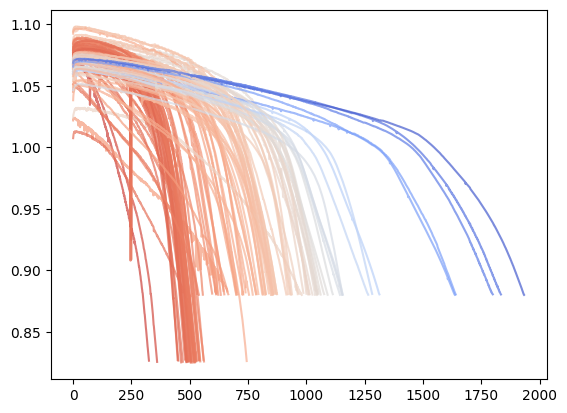

In [2]:
%matplotlib inline
from SeversonDataset_preprocess import data_visualization

data_visualization(f_id =1) # capacity fade curve for all cells

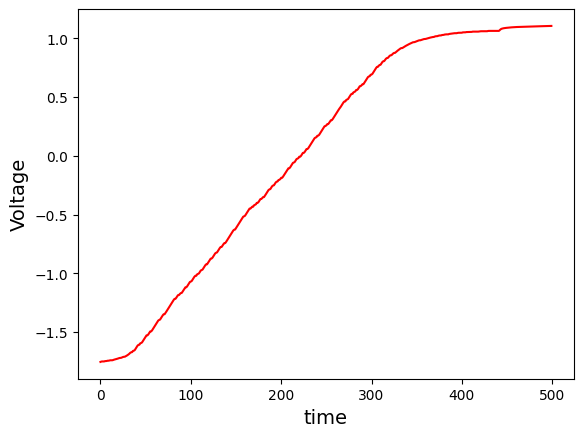

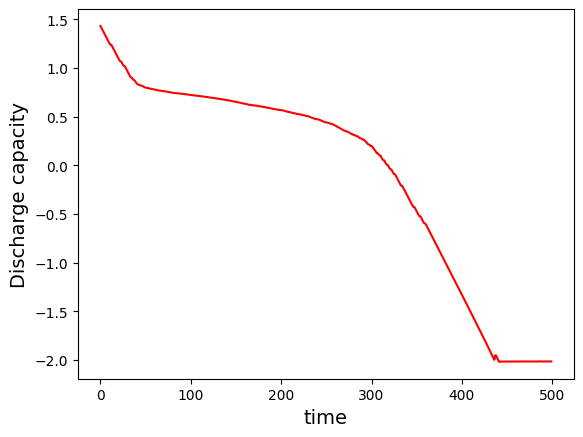

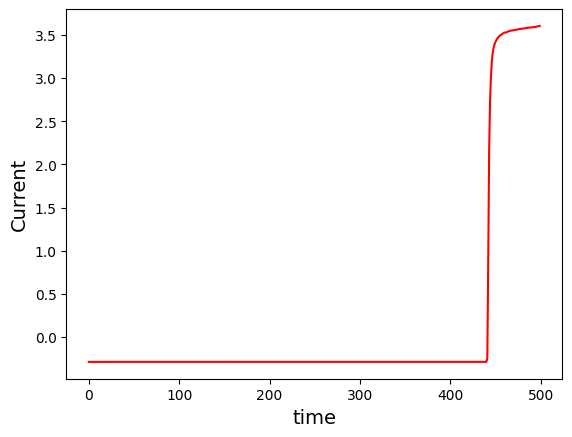

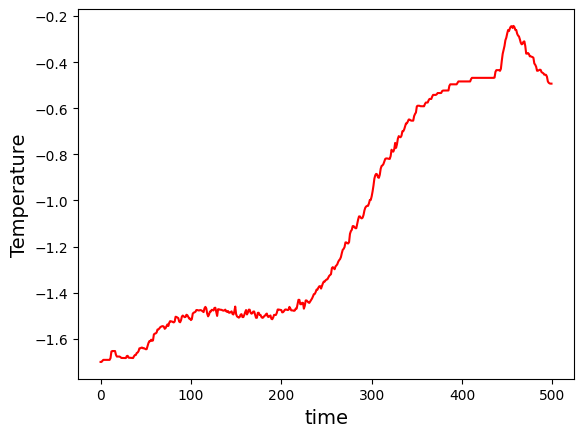

In [ ]:
%matplotlib inline
from SeversonDataset_preprocess import train_val_split
from data_preprocessing import Feature_Selector_Dataset

# training:testing = 8:2
train_val_split(seed=41) 

# load dataset for pytorch
feature_selector_set = Feature_Selector_Dataset(train=True, pred_target='quality', part='discharge', norm=False)
feature_selector_set.visualize(120, 0)
feature_selector_set.visualize(120, 1)
feature_selector_set.visualize(120, 2)
feature_selector_set.visualize(120, 3)

In [3]:
from data_preprocessing import load_Severson
trn_feature, trn_target = load_Severson(training=True, norm=False, part='discharge')

In [5]:
print(trn_feature.shape)
print(trn_target.shape)

(4550, 4, 500)
(4550, 3)


In [6]:

# Reshape the training data from (4550, 4, 500) to (91, 100000)
# 4550 = 91 batteries * 50 cycles, reshaping cycles and features
num_batteries = 91
num_features = trn_feature.shape[1]
data_per_cycle = trn_feature.shape[2]
training_data_reshaped = trn_feature.reshape(num_batteries, -1)  # (91, 100000)

# Extract the last target ([:,2]) and reshape into (91, 1)
# Ensure only one target per battery by taking the first target for each set of 50 cycles
training_target_reshaped = trn_target[::50, 2].reshape(num_batteries, -1)  # (91, 1)

In [7]:
print(training_data_reshaped.shape)
print(training_target_reshaped.shape)

(91, 100000)
(91, 1)
